In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Final datasets/USAID/combined_usaid_country.csv')
target = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/FINAL ML/SUPERVISED LEARNING/target_encoding.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
target

,Unnamed: 0,Country Name,Result_Inv
0,0,Afghanistan,No Positive Change
1,1,Albania,Positive Change
2,2,Angola,No Positive Change
3,3,Armenia,Positive Change
4,4,Azerbaijan,No Positive Change
...,...,...,...
66,66,Ukraine,Positive Change
67,67,Vietnam,No Positive Change
68,68,West Bank and Gaza,Positive Change
69,69,Yemen,No Positive Change


In [5]:
df

,country,duration_mean,topic0_mean,topic1_mean,topic2_mean,topic3_mean,topic4_mean,dominant_topic_4_count,dominant_topic_3_count,dominant_topic_2_count,...,awd_amount_median_low,awd_amount_median,awd_amount_median_high,awd_amount_high,awd_amount_very_high,corruption_initial,stability_initial,numberofprojects,change_stability,change_corruption
0,Afghanistan,3.071429,0.036429,0.037857,0.066071,0.176429,0.679643,23,4,1,...,3,1,7,7,5,High Corruption,Unstable,28,Worse,Worse
1,Albania,3.750000,0.037500,0.078750,0.053750,0.308750,0.523750,5,3,0,...,6,2,0,0,0,High Corruption,Unstable,8,Same,Same
2,Angola,5.000000,0.030000,0.030000,0.030000,0.030000,0.870000,1,0,0,...,0,1,0,0,0,High Corruption,Unstable,1,Same,Same
3,Armenia,4.250000,0.035000,0.035000,0.035000,0.035000,0.862500,4,0,0,...,1,1,0,0,0,High Corruption,Unstable,4,Same,Same
4,Azerbaijan,2.800000,0.032000,0.032000,0.032000,0.150000,0.752000,4,1,0,...,1,1,0,0,0,High Corruption,Unstable,5,Same,Same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Ukraine,3.375000,0.035000,0.041250,0.038750,0.541250,0.338750,2,6,0,...,3,2,0,0,0,High Corruption,Unstable,8,Same,Same
70,Vietnam,3.500000,0.040000,0.040000,0.040000,0.845000,0.040000,0,2,0,...,0,2,0,0,0,High Corruption,Unstable,2,Same,Same
71,West Bank and Gaza,4.200000,0.034000,0.034000,0.047000,0.313000,0.580000,7,3,0,...,1,4,2,2,0,High Corruption,Very Unstable,10,Same,Same
72,Yemen,4.000000,0.036667,0.036667,0.096667,0.036667,0.800000,3,0,0,...,0,1,1,0,0,High Corruption,Very Unstable,3,Same,Same


In [6]:
result = df.merge(target, left_on = 'country',right_on = 'Country Name', how = 'right')

In [7]:
result.dropna(inplace=True)

In [8]:
result.drop(['country','Unnamed: 0'],axis=1,inplace=True)

In [9]:
col = result.columns.to_list()

In [10]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 62 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   duration_mean                                                            67 non-null     float64
 1   topic0_mean                                                              67 non-null     float64
 2   topic1_mean                                                              67 non-null     float64
 3   topic2_mean                                                              67 non-null     float64
 4   topic3_mean                                                              67 non-null     float64
 5   topic4_mean                                                              67 non-null     float64
 6   dominant_topic_4_count                                                   67 

In [11]:
list(result.select_dtypes(include=['object']).columns)
## TIHNK ABOUT COLUMNS TO INCLUDE AS LABEL ENCODER AND ONE HOT ENCODER

['max_count_topic_categories',
 'max_count_sector_categories',
 'corruption_initial',
 'stability_initial',
 'change_stability',
 'change_corruption',
 'Country Name',
 'Result_Inv']

In [12]:
## DATA PREP

col = ['corruption_initial',
 'stability_initial',
 'change_stability',
 'change_corruption',]


cor_ord = ['High Corruption', 'Very High Corruption']
sta_ord = ['Unstable', 'Very Unstable']
chg_ord = ['Worse', 'Same', 'Better']


from sklearn.preprocessing import LabelEncoder
y = result['Result_Inv']
X = result.drop(['Result_Inv'],axis=1)

def ordered_labels(df, col, order):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.reorder_categories(order, ordered=True)
    df[col] = df[col].cat.codes.astype(int)
    
    
    
ordered_labels(X, 'corruption_initial', cor_ord)
ordered_labels(X, 'stability_initial', sta_ord)
ordered_labels(X, 'change_stability', chg_ord)
ordered_labels(X, 'change_corruption', chg_ord)


dummies = ['max_count_topic_categories',
 'max_count_sector_categories',
    'Country Name']

for i in dummies:
    X = pd.concat([X, pd.get_dummies(X[i])],axis=1).drop(i,axis=1)

In [13]:
X

,duration_mean,topic0_mean,topic1_mean,topic2_mean,topic3_mean,topic4_mean,dominant_topic_4_count,dominant_topic_3_count,dominant_topic_2_count,dominant_topic_1_count,...,Sierra Leone,Sri Lanka,Thailand,Turkmenistan,Uganda,Ukraine,Vietnam,West Bank and Gaza,Yemen,Zambia
0,3.071429,0.036429,0.037857,0.066071,0.176429,0.679643,23.0,4.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3.750000,0.037500,0.078750,0.053750,0.308750,0.523750,5.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5.000000,0.030000,0.030000,0.030000,0.030000,0.870000,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4.250000,0.035000,0.035000,0.035000,0.035000,0.862500,4.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2.800000,0.032000,0.032000,0.032000,0.150000,0.752000,4.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,3.375000,0.035000,0.041250,0.038750,0.541250,0.338750,2.0,6.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
63,3.500000,0.040000,0.040000,0.040000,0.845000,0.040000,0.0,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
64,4.200000,0.034000,0.034000,0.047000,0.313000,0.580000,7.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
65,4.000000,0.036667,0.036667,0.096667,0.036667,0.800000,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(scaled_X, y)

[Text(196.94117647058823, 205.35999999999999, 'X[33] <= 0.358\ngini = 0.499\nsamples = 67\nvalue = [32, 35]'),
 Text(98.47058823529412, 181.2, 'X[33] <= -1.064\ngini = 0.453\nsamples = 49\nvalue = [17, 32]'),
 Text(39.38823529411765, 157.04, 'X[31] <= -2.494\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(19.694117647058825, 132.88, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(59.082352941176474, 132.88, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(157.5529411764706, 157.04, 'X[34] <= -0.177\ngini = 0.402\nsamples = 43\nvalue = [12, 31]'),
 Text(98.47058823529412, 132.88, 'X[31] <= -0.808\ngini = 0.496\nsamples = 22\nvalue = [10, 12]'),
 Text(78.7764705882353, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(118.16470588235295, 108.72, 'X[3] <= -0.285\ngini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(98.47058823529412, 84.56, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(137.85882352941178, 84.56, 'X[48] <= 0.414\ngini = 0.473\nsamples = 13\nvalue = [5, 8

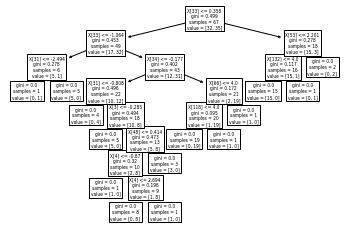

In [15]:
tree.plot_tree(clf,) 

In [27]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=X.columns.to_list())

In [28]:
print(r)

|--- res_senti_score_mean <= 0.36
|   |--- res_senti_score_mean <= -1.06
|   |   |--- desc_senti_score_mean <= -2.49
|   |   |   |--- class: Positive Change
|   |   |--- desc_senti_score_mean >  -2.49
|   |   |   |--- class: No Positive Change
|   |--- res_senti_score_mean >  -1.06
|   |   |--- res_sub_score_mean <= -0.18
|   |   |   |--- desc_senti_score_mean <= -0.81
|   |   |   |   |--- class: Positive Change
|   |   |   |--- desc_senti_score_mean >  -0.81
|   |   |   |   |--- topic2_mean <= -0.28
|   |   |   |   |   |--- class: No Positive Change
|   |   |   |   |--- topic2_mean >  -0.28
|   |   |   |   |   |--- awd_amount_median_low <= 0.41
|   |   |   |   |   |   |--- topic3_mean <= -0.87
|   |   |   |   |   |   |   |--- class: No Positive Change
|   |   |   |   |   |   |--- topic3_mean >  -0.87
|   |   |   |   |   |   |   |--- topic3_mean <= 2.69
|   |   |   |   |   |   |   |   |--- class: Positive Change
|   |   |   |   |   |   |   |--- topic3_mean >  2.69
|   |   |   |   |   |

In [34]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [35]:
feature_cols = list(X.columns.values)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
##conda install graphviz  

#If code deosn't work. 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ 